# Fifa 2022 data set and Analysis

### Importing packages and data set:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:/Users/issam/players_22.csv")

C:\Users\issam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (22,105) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential  value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000    320000   34  ...   
1                   ST       92         92  119500000    270000   32  ...   
2               ST, LW       91         91   45000000    270000   36  ...   
3              LW, CAM       91         91  129000000    270000   29  ...   
4              CM, CAM       91         91  125500000    350000   30  ...   
...                ...      ...        ...        ...       ...  ...  ...   
19234              CDM       47         52      70000      1000   22  ...   
19235               CM       47         59     110000       500   19  ...   
19236               CM       47         55     100000       500   21  ...   
19237               ST       47         60     110000       500   19  ...   
19238              CAM       47         60     110000       500   19  ...   

        lcb    cb   rcb    rb    gk  \
0      50+3  50+3  50+3  61+3  19+3   
1      60+3  60+3  60+3  61+3  19+3   
2      53+3  53+3  53+3  60+3  20+3   
3      50+3  50+3  50+3  62+3  20+3   
4      69+3  69+3  69+3  75+3  21+3   
...     ...   ...   ...   ...   ...   
19234  46+2  46+2  46+2  48+2  15+2   
19235  44+2  44+2  44+2  48+2  14+2   
19236  45+2  45+2  45+2  47+2  12+2   
19237  26+2  26+2  26+2  32+2  15+2   
19238  41+2  41+2  41+2  45+2  16+2   

                                         player_face_url  \
0      https://cdn.sofifa.com/players/158/023/22_120.png   
1      https://cdn.sofifa.com/players/188/545/22_120.png   
2      https://cdn.sofifa.com/players/020/801/22_120.png   
3      https://cdn.sofifa.com/players/190/871/22_120.png   
4      https://cdn.sofifa.com/players/192/985/22_120.png   
...                                                  ...   
19234  https://cdn.sofifa.com/players/261/962/22_120.png   
19235  https://cdn.sofifa.com/players/262/040/22_120.png   
19236  https://cdn.sofifa.com/players/262/760/22_120.png   
19237  https://cdn.sofifa.com/players/262/820/22_120.png   
19238  https://cdn.sofifa.com/players/264/540/22_120.png   

                                    club_logo_url  \
0          https://cdn.sofifa.com/teams/73/60.png   
1          https://cdn.sofifa.com/teams/21/60.png   
2          https://cdn.sofifa.com/teams/11/60.png   
3          https://cdn.sofifa.com/

## Exploratory data analysis.

### Removing unecessary columns.

In [4]:
df=df.drop(['sofifa_id','player_url','long_name','dob','club_jersey_number','club_loaned_from','club_joined','club_contract_valid_until','nation_position','nation_jersey_number','body_type','real_face',
'release_clause_eur','player_tags','player_traits','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','player_face_url',
'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url'], axis=1)
df

short_name player_positions  overall  potential  value_eur  \
0                L. Messi       RW, ST, CF       93         93   78000000   
1          R. Lewandowski               ST       92         92  119500000   
2       Cristiano Ronaldo           ST, LW       91         91   45000000   
3               Neymar Jr          LW, CAM       91         91  129000000   
4            K. De Bruyne          CM, CAM       91         91  125500000   
...                   ...              ...      ...        ...        ...   
19234           Song Defu              CDM       47         52      70000   
19235           C. Porter               CM       47         59     110000   
19236            N. Logue               CM       47         55     100000   
19237           L. Rudden               ST       47         60     110000   
19238  E. Lalchhanchhuaha              CAM       47         60     110000   

       wage_eur  age  height_cm  weight_kg            club_name  ...  \
0        320000   34        170         72  Paris Saint-Germain  ...   
1        270000   32        185         81    FC Bayern München  ...   
2        270000   36        187         83    Manchester United  ...   
3        270000   29        175         68  Paris Saint-Germain  ...   
4        350000   30        181         70      Manchester City  ...   
...         ...  ...        ...        ...                  ...  ...   
19234      1000   22        180         64             Wuhan FC  ...   
19235       500   19        175         70           Derry City  ...   
19236       500   21        178         72           Finn Harps  ...   
19237       500   19        173         66           Finn Harps  ...   
19238       500   19        167         61  NorthEast United FC  ...   

      mentality_composure  defending_marking_awareness  \
0                      96                           20   
1                      88                           35   
2                      95                           24   
3                      93                           35   
4                      89                           68   
...                   ...                          ...   
19234                  37                           38   
19235                  47                           37   
19236                  36                           38   
19237                  47                           10   
19238                  36                           33   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
0                            35                       24                  6   
1                            42                       19                 15   
2                            32                       24                  7   
3                            32                       29                  9   
4                            65                       53                 15   
...                         ...                      ...                ...   
19234                        43                       48                  6   
19235                        44                       47                 11   
19236                        44                       48                  8   
19237                        14                       11                  7   
19238                        31                       37                  8   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                        11                   15                       14   
1                         6                   12                        8   
2                        11                   15                       14   
3                         9                   15                       15   
4                        13                    5                       10   
...                     ...                  ...                      ...   
19234                    10             

### Creating seperate dataframe for goalkeepers for future machine learning and analysis.

In [5]:
df_goalkeeper= df.loc[df['player_positions'].str.contains('GK')]
df_goalkeeper

short_name player_positions  overall  potential  value_eur  \
5               J. Oblak               GK       91         93  112000000   
7               M. Neuer               GK       90         90   13500000   
8          M. ter Stegen               GK       90         92   99000000   
12           T. Courtois               GK       89         91   85500000   
18               Ederson               GK       89         91   94000000   
...                  ...              ...      ...        ...        ...   
19210          Gao Xiang               GK       48         54      60000   
19216  H. Wiles-Richards               GK       48         65     110000   
19225        D. Da Silva               GK       47         55      90000   
19227          A. Shaikh               GK       47         67     110000   
19231              R. By               GK       47         55      90000   

       wage_eur  age  height_cm  weight_kg           club_name  ...  \
5        130000   28        188         87  Atlético de Madrid  ...   
7         86000   35        193         93   FC Bayern München  ...   
8        250000   29        187         85        FC Barcelona  ...   
12       250000   29        199         96      Real Madrid CF  ...   
18       200000   27        188         86     Manchester City  ...   
...         ...  ...        ...        ...                 ...  ...   
19210       800   20        182         70            Wuhan FC  ...   
19216      1000   19        180         72        Bristol City  ...   
19225       500   21        175         77              FC Goa  ...   
19227       500   18        186         74  ATK Mohun Bagan FC  ...   
19231       500   22        181         74       Chennaiyin FC  ...   

      mentality_composure  defending_marking_awareness  \
5                      68                           27   
7                      70                           17   
8                      70                           25   
12                     66                           20   
18                     70                           29   
...                   ...                          ...   
19210                  33                           12   
19216                  23                            9   
19225                  22                            6   
19227                  23                            7   
19231                  39                            5   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
5                            12                       18                 87   
7                            10                       11                 88   
8                            13                       10                 88   
12                           18                       16                 84   
18                           15                        8                 87   
...                         ...                      ...                ...   
19210                        15                       16                 46   
19216                        12                       13                 52   
19225                        12                       12                 48   
19227                        14                       13                 49   
19231                        13                       13                 49   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
5                        92                   78                       90   
7                        88                   91                       89   
8                        85                   88                       88   
12                       89                   74                       86   
18                       82                   93                       88   
...                     ...                  ...                      ...   
19210                    49                   51               

### Creating seperate dataframe for defenders for future machine learning and analysis.

In [6]:
df_defense= df.loc[df['player_positions'].str.contains('CB') | df['player_positions'].str.contains('LB')|df['player_positions'].str.contains('RB') |df['player_positions'].str.contains('RCB')|df['player_positions'].str.contains('LCB')]
df_defense

short_name player_positions  overall  potential  value_eur  wage_eur  \
15      V. van Dijk               CB       89         89   86000000    230000   
19       J. Kimmich          CDM, RB       89         90  108000000    160000   
22     Sergio Ramos               CB       88         88   24000000    115000   
39       Marquinhos          CB, CDM       87         90   90500000    135000   
42     A. Robertson               LB       87         88   83500000    175000   
...             ...              ...      ...        ...        ...       ...   
19212      He Siwei               CB       48         58     100000       950   
19213    Yang Haoyu               CB       48         55      90000      1000   
19215      S. Black               CB       48         62     100000       500   
19218     C. Mutawe               CB       48         58     100000       500   
19222  Wang Shilong               CB       47         60     110000      2000   

       age  height_cm  weight_kg                          club_name  ...  \
15      29        193         92                          Liverpool  ...   
19      26        177         75                  FC Bayern München  ...   
22      35        184         82                Paris Saint-Germain  ...   
39      27        183         75                Paris Saint-Germain  ...   
42      27        178         64                          Liverpool  ...   
...    ...        ...        ...                                ...  ...   
19212   20        174         69      Chongqing Liangjiang Athletic  ...   
19213   20        183         77  Dalian Professional Football Club  ...   
19215   19        180         75                         Finn Harps  ...   
19218   20        184         60                    Drogheda United  ...   
19222   20        177         64                       Guangzhou FC  ...   

      mentality_composure  defending_marking_awareness  \
15                     90                           92   
19                     85                           85   
22                     88                           84   
39                     86                           89   
42                     83                           83   
...                   ...                          ...   
19212                  42                           52   
19213                  45                           52   
19215                  44                           50   
19218                  41                           50   
19222                  41                           53   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
15                           92                       86                 13   
19                           85                       79                  8   
22                           89                       91                 11   
39                           89                       89                  6   
42                           84                       81                 11   
...                         ...                      ...                ...   
19212                        51                       52                 10   
19213                        53                       51                 14   
19215                        49                       47                  5   
19218                        55                       49                 13   
19222                        54                       52                  8   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
15                       10                   13                       11   
19                       15                    7                       15   
22                        8                    9                        7   
39                        6                   12                       10   
42                        8                   10                        7   
...            

### Creating seperate dataframe for midfielders for future machine learning and analysis.

In [7]:
df_midfield=df.loc[df['player_positions'].str.contains('CDM') | df['player_positions'].str.contains('CAM') | df['player_positions'].str.contains('CM') | df['player_positions'].str.contains('RDM') | df['player_positions'].str.contains('LDM') | df['player_positions'].str.contains('RM') | df['player_positions'].str.contains('LM') | df['player_positions'].str.contains('RWB')|df['player_positions'].str.contains('LWB')|df['player_positions'].str.contains('LAM')|df['player_positions'].str.contains('RAM')|df['player_positions'].str.contains('LCM')|df['player_positions'].str.contains('RCM')]
df_midfield

short_name player_positions  overall  potential  value_eur  \
3               Neymar Jr          LW, CAM       91         91  129000000   
4            K. De Bruyne          CM, CAM       91         91  125500000   
10               N. Kanté          CDM, CM       90         90  100000000   
13                 H. Son       LM, CF, LW       89         89  104000000   
14               Casemiro              CDM       89         89   88000000   
...                   ...              ...      ...        ...        ...   
19233        R. Gallagher              CAM       47         61     110000   
19234           Song Defu              CDM       47         52      70000   
19235           C. Porter               CM       47         59     110000   
19236            N. Logue               CM       47         55     100000   
19238  E. Lalchhanchhuaha              CAM       47         60     110000   

       wage_eur  age  height_cm  weight_kg            club_name  ...  \
3        270000   29        175         68  Paris Saint-Germain  ...   
4        350000   30        181         70      Manchester City  ...   
10       230000   30        168         70              Chelsea  ...   
13       220000   28        183         78    Tottenham Hotspur  ...   
14       310000   29        185         84       Real Madrid CF  ...   
...         ...  ...        ...        ...                  ...  ...   
19233       500   20        180         74           Finn Harps  ...   
19234      1000   22        180         64             Wuhan FC  ...   
19235       500   19        175         70           Derry City  ...   
19236       500   21        178         72           Finn Harps  ...   
19238       500   19        167         61  NorthEast United FC  ...   

      mentality_composure  defending_marking_awareness  \
3                      93                           35   
4                      89                           68   
10                     84                           90   
13                     89                           50   
14                     84                           85   
...                   ...                          ...   
19233                  43                           37   
19234                  37                           38   
19235                  47                           37   
19236                  36                           38   
19238                  36                           33   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
3                            32                       29                  9   
4                            65                       53                 15   
10                           93                       86                 15   
13                           34                       33                 11   
14                           88                       87                 13   
...                         ...                      ...                ...   
19233                        31                       29                 14   
19234                        43                       48                  6   
19235                        44                       47                 11   
19236                        44                       48                  8   
19238                        31                       37                  8   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
3                         9                   15                       15   
4                        13                    5                       10   
10                       12                   10                        7   
13                       13                   13                        6   
14                       14                   16                       12   
...                     ...                  ...                      ...   
19233                    10             

### Creating seperate dataframe for attackers for future machine learning and analysis.

In [8]:
df_attack=df.loc[df['player_positions'].str.contains('ST') | df['player_positions'].str.contains('CF') | df['player_positions'].str.contains('LW') | df['player_positions'].str.contains('RW') | df['player_positions'].str.contains('LS') 
                 | df['player_positions'].str.contains('RS') | df['player_positions'].str.contains('LF') | df['player_positions'].str.contains('RF')]
df_attack

short_name player_positions  overall  potential  value_eur  \
0               L. Messi       RW, ST, CF       93         93   78000000   
1         R. Lewandowski               ST       92         92  119500000   
2      Cristiano Ronaldo           ST, LW       91         91   45000000   
3              Neymar Jr          LW, CAM       91         91  129000000   
6              K. Mbappé           ST, LW       91         95  194000000   
...                  ...              ...      ...        ...        ...   
19219         E. Kwelele               ST       48         62     110000   
19220         D. Collins           ST, RM       47         56     100000   
19221       Wang Zhen'ao               RW       47         57     110000   
19228           F. Molla               CF       47         67     130000   
19237          L. Rudden               ST       47         60     110000   

       wage_eur  age  height_cm  weight_kg                          club_name  \
0        320000   34        170         72                Paris Saint-Germain   
1        270000   32        185         81                  FC Bayern München   
2        270000   36        187         83                  Manchester United   
3        270000   29        175         68                Paris Saint-Germain   
6        230000   22        182         73                Paris Saint-Germain   
...         ...  ...        ...        ...                                ...   
19219       500   19        177         74                         Dundalk FC   
19220       500   20        174         68                       Sligo Rovers   
19221      2000   21        170         58  Dalian Professional Football Club   
19228       500   19        161         63                 ATK Mohun Bagan FC   
19237       500   19        173         66                         Finn Harps   

       ... mentality_composure  defending_marking_awareness  \
0      ...                  96                           20   
1      ...                  88                           35   
2      ...                  95                           24   
3      ...                  93                           35   
6      ...                  88                           26   
...    ...                 ...                          ...   
19219  ...                  46                           18   
19220  ...                  47                           39   
19221  ...                  45                           26   
19228  ...                  44                           16   
19237  ...                  47                           10   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
0                            35                       24                  6   
1                            42                       19                 15   
2                            32                       24                  7   
3                            32                       29                  9   
6                            34                       32                 13   
...                         ...                      ...                ...   
19219                        20                       29                  7   
19220                        29                       27                  6   
19221                        32                       42                 14   
19228                        16                       11                  8   
19237                        14                       11                  7   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                        11                   15                       14   
1                         6                   12                        8   
2                        11                   15                       14   
3                         9                   15                       15   
6                         5          

### Reviewing missing values

In [9]:
df.isnull().sum()

short_name                         0
player_positions                   0
overall                            0
potential                          0
value_eur                          0
wage_eur                           0
age                                0
height_cm                          0
weight_kg                          0
club_name                         61
league_name                       61
league_level                      61
club_position                     61
nationality                        0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
a

#### The missing 2132 values in pace, shooting, passing, dribbling, defending and physic are missing due to these values belongning to goalkeepers, who are not rated according to these traits as seen below:

In [10]:
null_2132= df[df['pace'].isnull()|df['shooting'].isnull()|df['passing'].isnull()|df['dribbling'].isnull()|df['defending'].isnull()|df['physic'].isnull()]
null_2132

short_name player_positions  overall  potential  value_eur  \
5               J. Oblak               GK       91         93  112000000   
7               M. Neuer               GK       90         90   13500000   
8          M. ter Stegen               GK       90         92   99000000   
12           T. Courtois               GK       89         91   85500000   
18               Ederson               GK       89         91   94000000   
...                  ...              ...      ...        ...        ...   
19210          Gao Xiang               GK       48         54      60000   
19216  H. Wiles-Richards               GK       48         65     110000   
19225        D. Da Silva               GK       47         55      90000   
19227          A. Shaikh               GK       47         67     110000   
19231              R. By               GK       47         55      90000   

       wage_eur  age  height_cm  weight_kg           club_name  ...  \
5        130000   28        188         87  Atlético de Madrid  ...   
7         86000   35        193         93   FC Bayern München  ...   
8        250000   29        187         85        FC Barcelona  ...   
12       250000   29        199         96      Real Madrid CF  ...   
18       200000   27        188         86     Manchester City  ...   
...         ...  ...        ...        ...                 ...  ...   
19210       800   20        182         70            Wuhan FC  ...   
19216      1000   19        180         72        Bristol City  ...   
19225       500   21        175         77              FC Goa  ...   
19227       500   18        186         74  ATK Mohun Bagan FC  ...   
19231       500   22        181         74       Chennaiyin FC  ...   

      mentality_composure  defending_marking_awareness  \
5                      68                           27   
7                      70                           17   
8                      70                           25   
12                     66                           20   
18                     70                           29   
...                   ...                          ...   
19210                  33                           12   
19216                  23                            9   
19225                  22                            6   
19227                  23                            7   
19231                  39                            5   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
5                            12                       18                 87   
7                            10                       11                 88   
8                            13                       10                 88   
12                           18                       16                 84   
18                           15                        8                 87   
...                         ...                      ...                ...   
19210                        15                       16                 46   
19216                        12                       13                 52   
19225                        12                       12                 48   
19227                        14                       13                 49   
19231                        13                       13                 49   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
5                        92                   78                       90   
7                        88                   91                       89   
8                        85                   88                       88   
12                       89                   74                       86   
18                       82                   93                       88   
...                     ...                  ...                      ...   
19210                    49                   51               

#### The missing 61 values are with respect to players that are not currently employed or under contract at any club, but they are still relevant to our analysis and therefore will not be dropped as their remaining stats are relevant.

In [11]:
null_61= df[df['club_name'].isnull()|df['league_name'].isnull()|df['league_level'].isnull()|df['club_position'].isnull()]
null_61

short_name player_positions  overall  potential  value_eur  \
147    T. Alderweireld               CB       83         83          0   
416      G. Krychowiak          CDM, CM       80         80          0   
694          A. Dzyuba               ST       78         78          0   
926          M. Ozdoev          CDM, CM       77         78          0   
1146        Y. Zhirkov           LB, LM       76         76          0   
...                ...              ...      ...        ...        ...   
12269     B. Sævarsson               RB       63         63          0   
12891      O. Valakari          CM, CAM       63         68          0   
14199      M. Stamenic     CM, CDM, CAM       62         80          0   
14466          S. Roux               RB       61         61          0   
14654         P. Soiri           LW, RW       61         62          0   

       wage_eur  age  height_cm  weight_kg club_name  ... mentality_composure  \
147           0   32        186         81       NaN  ...                  86   
416           0   31        187         84       NaN  ...                  80   
694           0   32        196         91       NaN  ...                  79   
926           0   28        184         78       NaN  ...                  72   
1146          0   37        180         75       NaN  ...                  81   
...         ...  ...        ...        ...       ...  ...                 ...   
12269         0   36        187         74       NaN  ...                  62   
12891         0   21        187         82       NaN  ...                  66   
14199         0   19        188         78       NaN  ...                  71   
14466         0   28        181         71       NaN  ...                  54   
14654         0   26        183         63       NaN  ...                  53   

       defending_marking_awareness defending_standing_tackle  \
147                             87                        87   
416                             75                        76   
694                             25                        17   
926                             73                        76   
1146                            75                        74   
...                            ...                       ...   
12269                           63                        63   
12891                           45                        46   
14199                           50                        53   
14466                           48                        57   
14654                           46                        38   

      defending_sliding_tackle goalkeeping_diving  goalkeeping_handling  \
147                         84                 16                     6   
416                         72                 15                    14   
694                         21                 15                    12   
926                         73                 11                     8   
1146                        76                  6                     6   
...                        ...                ...                   ...   
12269                       58                  6                    12   
12891                       47                  6                     9   
14199                       52                 13                    10   
14466                       59                 10                    14   
14654                       44                 11                    12   

       goalkeeping_kicking  goalkeeping_positioning goalkeeping_reflexes  \
147                     14                       16                   14   
416                      8                        6                    7   
694                     11                       11                    8   
926                     16                       16                   15   
1146                    14                        7                   10   
...                    .

### Top leagues analysis:

#### The leagues are divided into 5 leagues depending on levels , with the highest league being rated as 1.0 and the lowest as 5.0 the top players such as Leonel Messi belong to league level 1.0 as shown below we will additionally be deviding the top leagues into the European top leagues as this is the highest level:

In [12]:
df['league_level'].value_counts()

1.0    14857
2.0     2513
3.0     1168
4.0      613
5.0       27
Name: league_level, dtype: int64

In [13]:
df_top_leagues=df[df['league_level']==1.0]
df_top_leagues_eu=df_top_leagues.loc[df_top_leagues['league_name'].str.contains('English Premier League')|df_top_leagues['league_name'].str.contains('Spain Primera Division')|df_top_leagues['league_name'].str.contains('French Ligue 1')|df_top_leagues['league_name'].str.contains('Italian Serie A')|
                                     df_top_leagues['league_name'].str.contains('German 1. Bundesliga')]
df_top_leagues_eu

short_name player_positions  overall  potential  value_eur  \
0               L. Messi       RW, ST, CF       93         93   78000000   
1         R. Lewandowski               ST       92         92  119500000   
2      Cristiano Ronaldo           ST, LW       91         91   45000000   
3              Neymar Jr          LW, CAM       91         91  129000000   
4           K. De Bruyne          CM, CAM       91         91  125500000   
...                  ...              ...      ...        ...        ...   
18510        B. Chrisene          LB, LWB       53         78     275000   
18692          O. Ashley               CM       52         64     200000   
18832      M. Nazaretian               GK       52         61     150000   
18877         P. Estrada           CB, CM       51         65     130000   
18878          O. Webber               GK       51         64     130000   

       wage_eur  age  height_cm  weight_kg                club_name  ...  \
0        320000   34        170         72      Paris Saint-Germain  ...   
1        270000   32        185         81        FC Bayern München  ...   
2        270000   36        187         83        Manchester United  ...   
3        270000   29        175         68      Paris Saint-Germain  ...   
4        350000   30        181         70          Manchester City  ...   
...         ...  ...        ...        ...                      ...  ...   
18510       500   17        181         68              Aston Villa  ...   
18692      6000   21        180         82          West Ham United  ...   
18832      2000   20        182         76   Olympique de Marseille  ...   
18877      5000   19        186         68  Wolverhampton Wanderers  ...   
18878      3000   21        185         75           Crystal Palace  ...   

      mentality_composure  defending_marking_awareness  \
0                      96                           20   
1                      88                           35   
2                      95                           24   
3                      93                           35   
4                      89                           68   
...                   ...                          ...   
18510                  50                           48   
18692                  47                           34   
18832                  33                            8   
18877                  50                           50   
18878                  16                            7   

      defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
0                            35                       24                  6   
1                            42                       19                 15   
2                            32                       24                  7   
3                            32                       29                  9   
4                            65                       53                 15   
...                         ...                      ...                ...   
18510                        43                       44                  5   
18692                        45                       44                 12   
18832                        10                       11                 58   
18877                        52                       51                  9   
18878                        10                       10                 53   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                        11                   15                       14   
1                         6                   12                        8   
2                        11                   15                       14   
3                         9                   15                       15   
4                        13                    5                       10   
...                     ...                  ...                      ...   
185

### Creating data frames for top wages in the top 5 leagues:

#### The English Premier League clubs pay a total of 33,152,700 per week of wages to their clubs which is a substansial amount.

In [14]:
df_wages_total=df_top_leagues_eu[['wage_eur','league_name']].groupby('league_name').sum().round()
df_wages_total

wage_eur
league_name                     
English Premier League  33152700
French Ligue 1          12384000
German 1. Bundesliga    13448650
Italian Serie A         17455550
Spain Primera Division  19704550

#### On average players in the most lucrative league are paid 50848 euros per week.

In [15]:
df_wages_avg=df_top_leagues_eu[['wage_eur','league_name']].groupby('league_name').mean().round()
df_wages_avg

wage_eur
league_name                     
English Premier League   50848.0
French Ligue 1           21463.0
German 1. Bundesliga     24408.0
Italian Serie A          31005.0
Spain Primera Division   31129.0

#### These are the wages of the top 10 most lucrative players and their respective leagues.

In [16]:
df_player_wage=df_top_leagues_eu[['short_name','wage_eur']].sort_values('wage_eur', ascending=False).head(10)
df_player_wage

short_name  wage_eur
11         K. Benzema    350000
4        K. De Bruyne    350000
0            L. Messi    320000
24           T. Kroos    310000
14           Casemiro    310000
27        R. Sterling    290000
17           M. Salah    270000
16            S. Mané    270000
2   Cristiano Ronaldo    270000
1      R. Lewandowski    270000

In [17]:
df_wages_position=df_top_leagues_eu[['wage_eur','club_position']].groupby('club_position').mean().sort_values('wage_eur',ascending=False).round()
df_wages_position

wage_eur
club_position          
CF             152000.0
LW             108250.0
RW              99000.0
ST              73864.0
LAM             72000.0
CDM             66500.0
RCM             53148.0
CAM             50902.0
LCM             50164.0
RF              47800.0
LDM             47000.0
RAM             46000.0
LB              45786.0
RDM             45771.0
GK              44347.0
RB              42936.0
LCB             42439.0
RCB             41214.0
LS              39595.0
LM              39484.0
LF              37800.0
RM              37359.0
RS              36865.0
RWB             36385.0
CB              33607.0
SUB             30969.0
CM              29786.0
LWB             29462.0
RES             11064.0

## Visualization

### Plotting the nationality of the total players in the dataset:

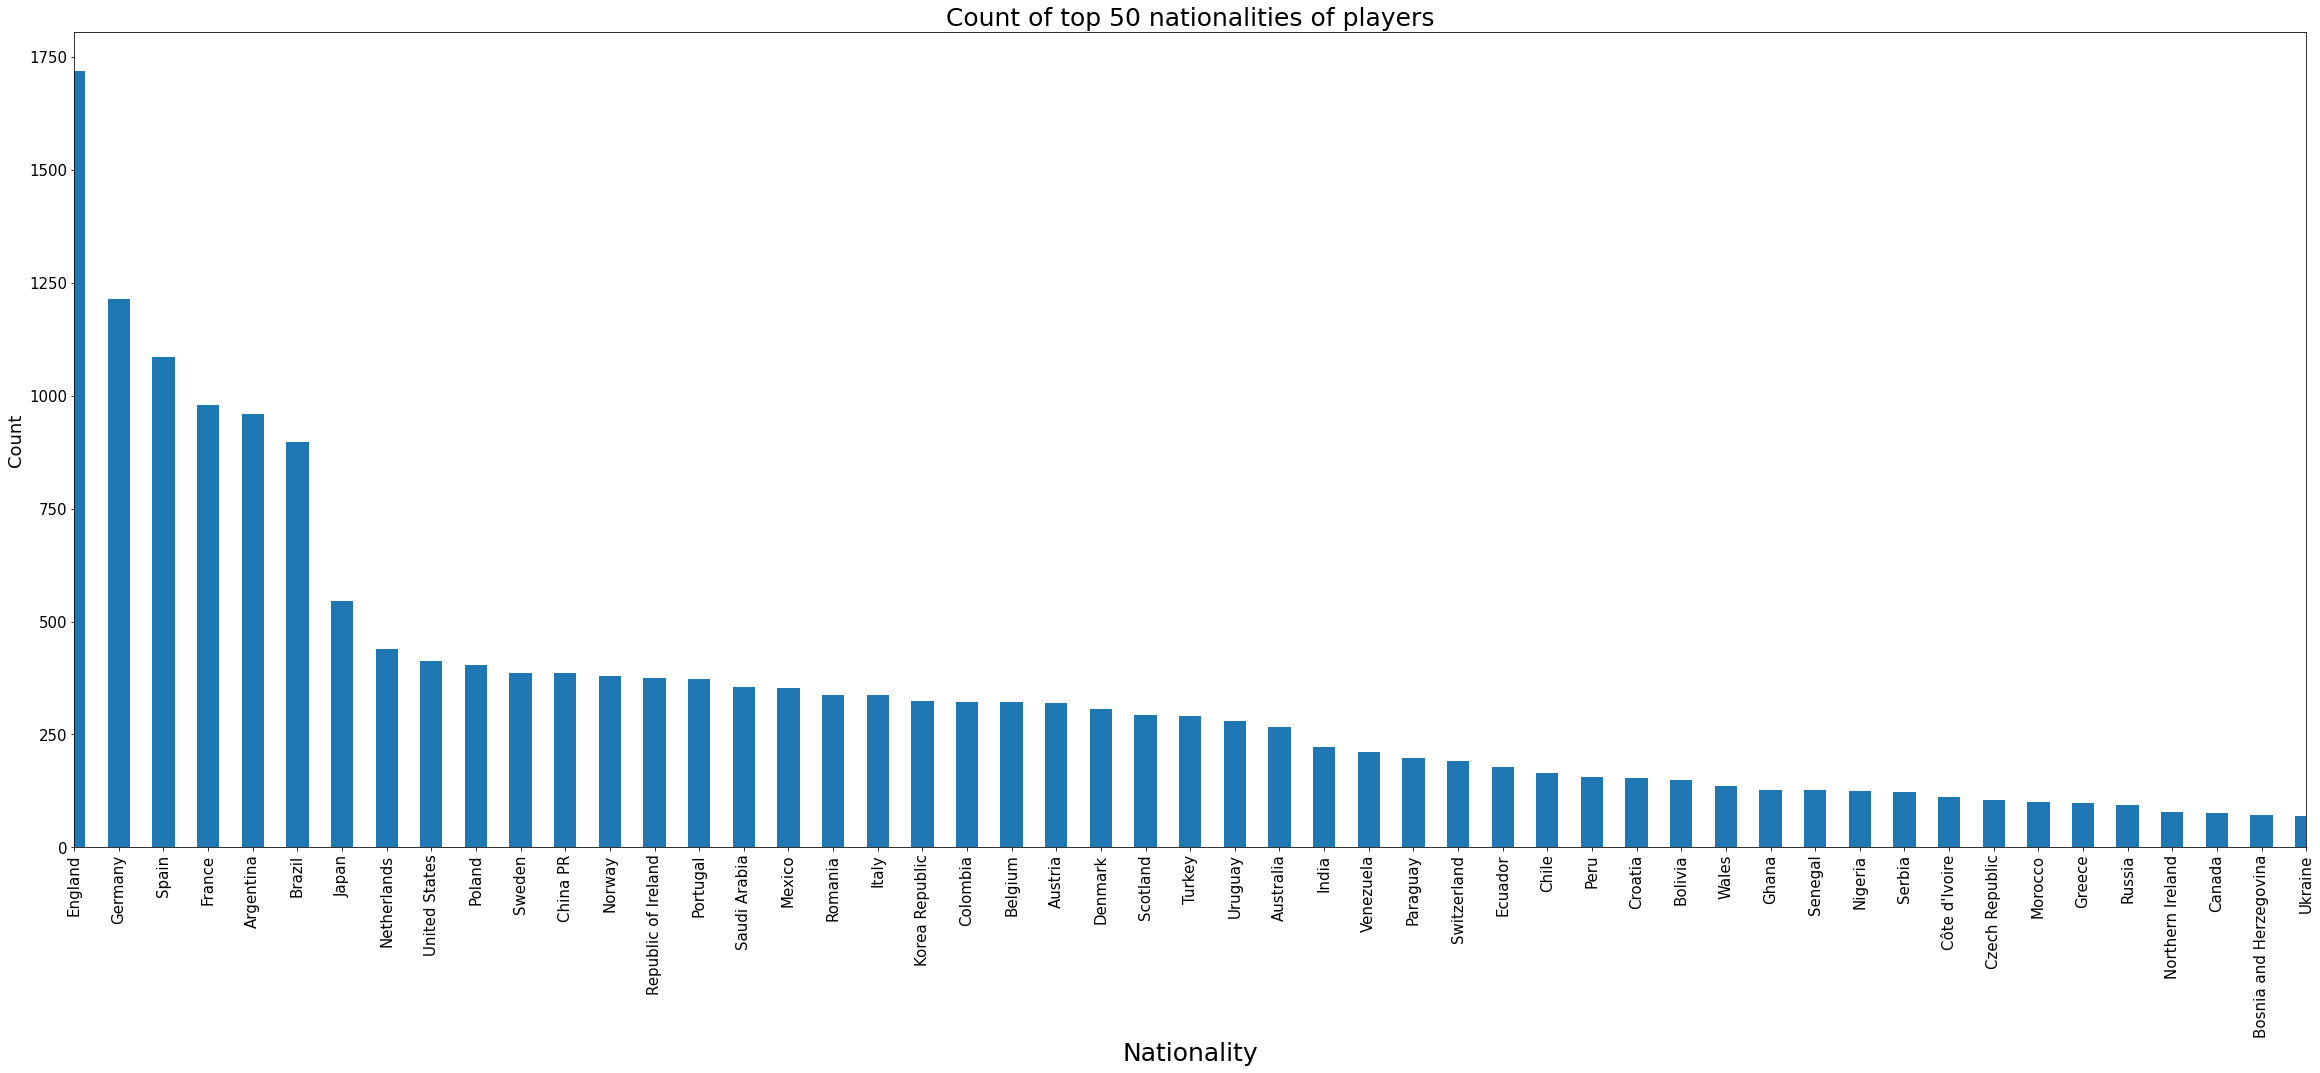

In [18]:
df['nationality'].value_counts().plot(kind='bar', figsize=(40, 15))
plt.title("Count of top 50 nationalities of players",fontsize=25)
plt.xlabel("Nationality",fontsize=25)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,50)
plt.show()

### Plotting the top 50 nationality of the players in the top 5 leagues in Europe:

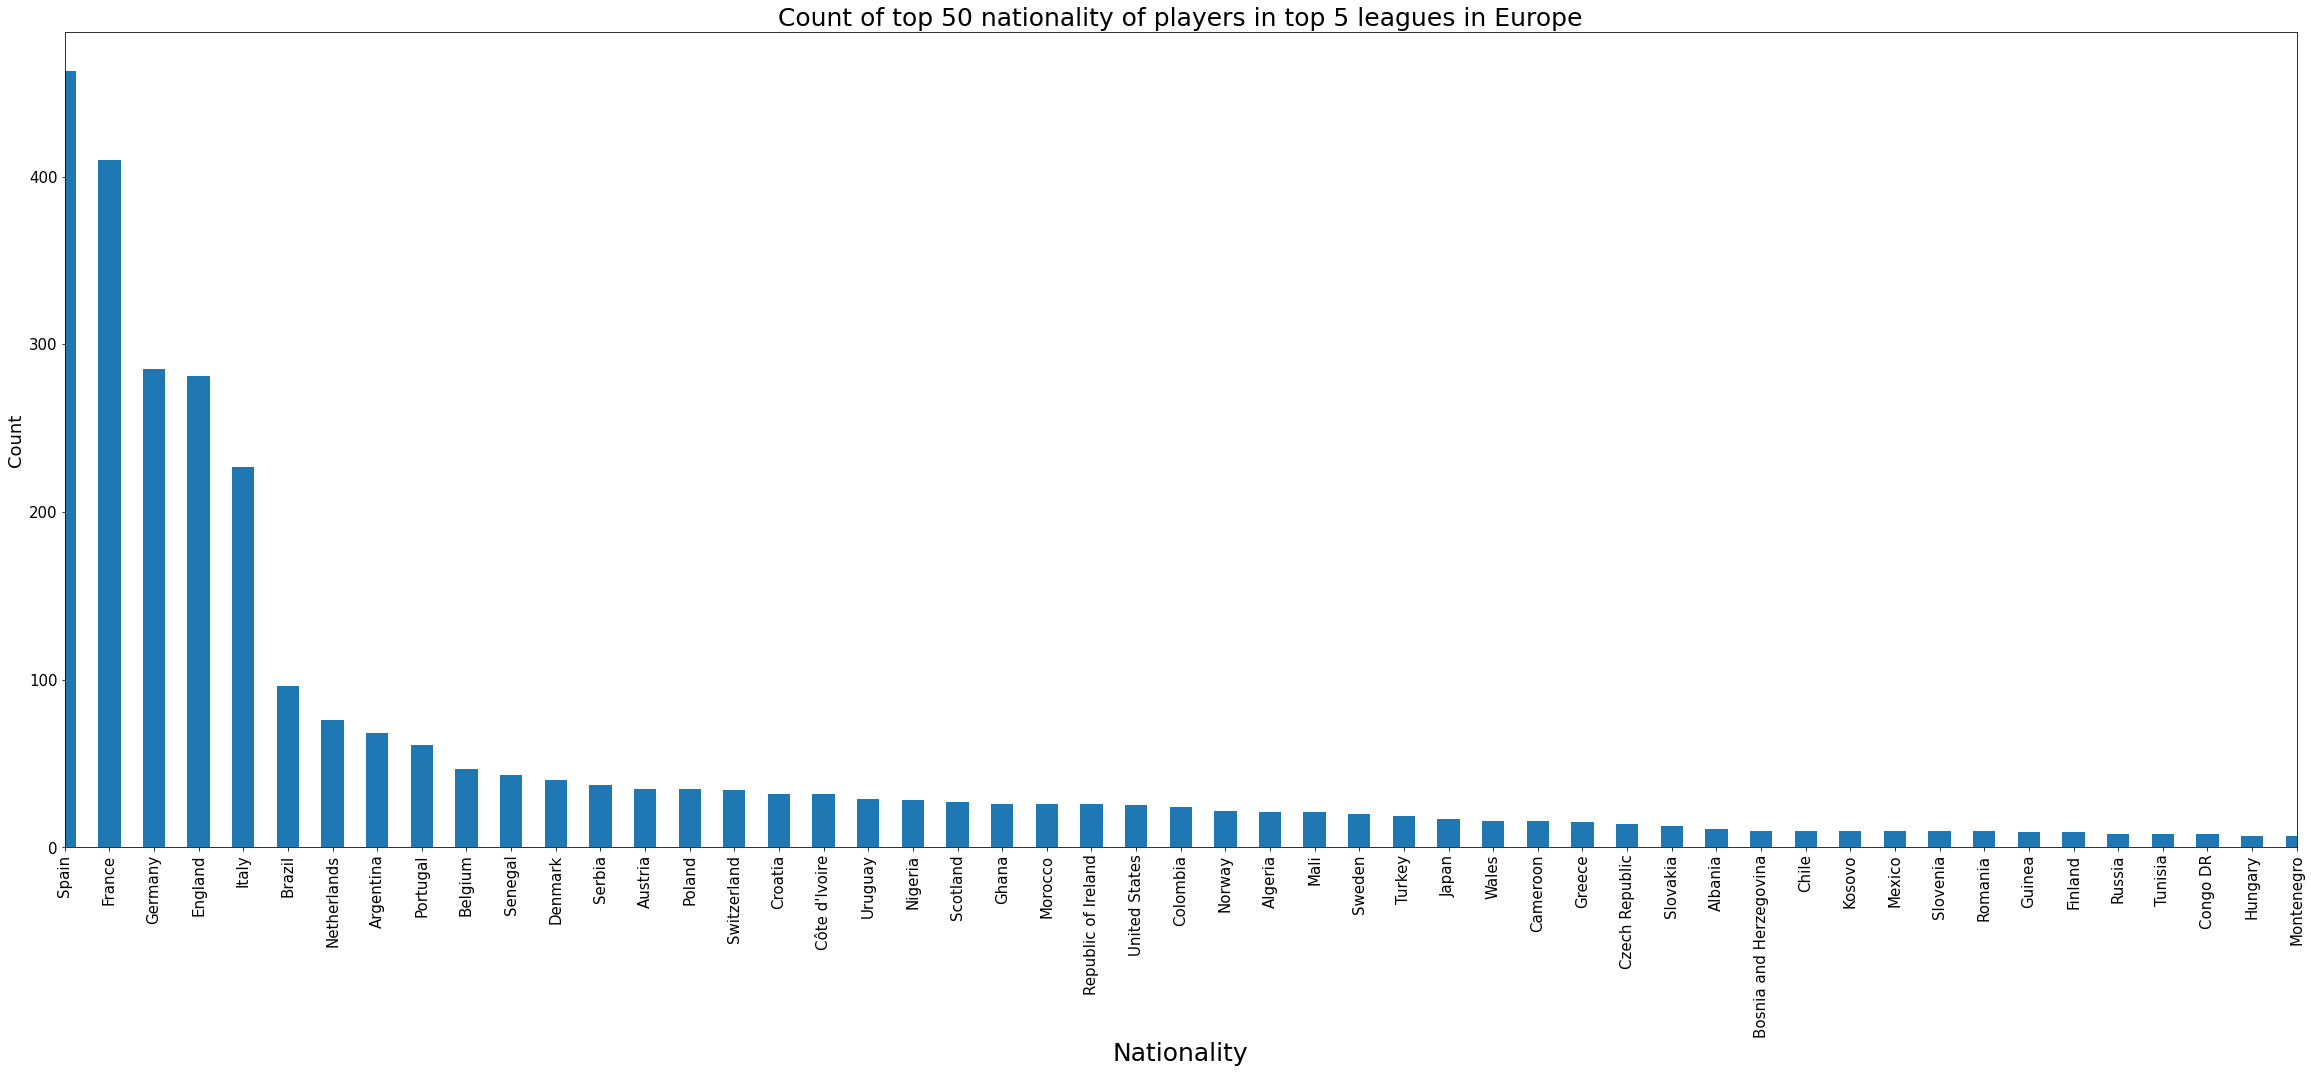

In [19]:
df_top_leagues_eu['nationality'].value_counts().plot(kind='bar', figsize=(40, 15))
plt.title("Count of top 50 nationality of players in top 5 leagues in Europe",fontsize=25)
plt.xlabel("Nationality",fontsize=25)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,50)
plt.show()

#### As expected there are high amounts of players that are native to their own leagues however we can see here that Spanish nationals occupy the biggest number in the top 5 leagues.

### Plotting the nationality of players in top 5 leagues in Europe that are not native to these leagues:

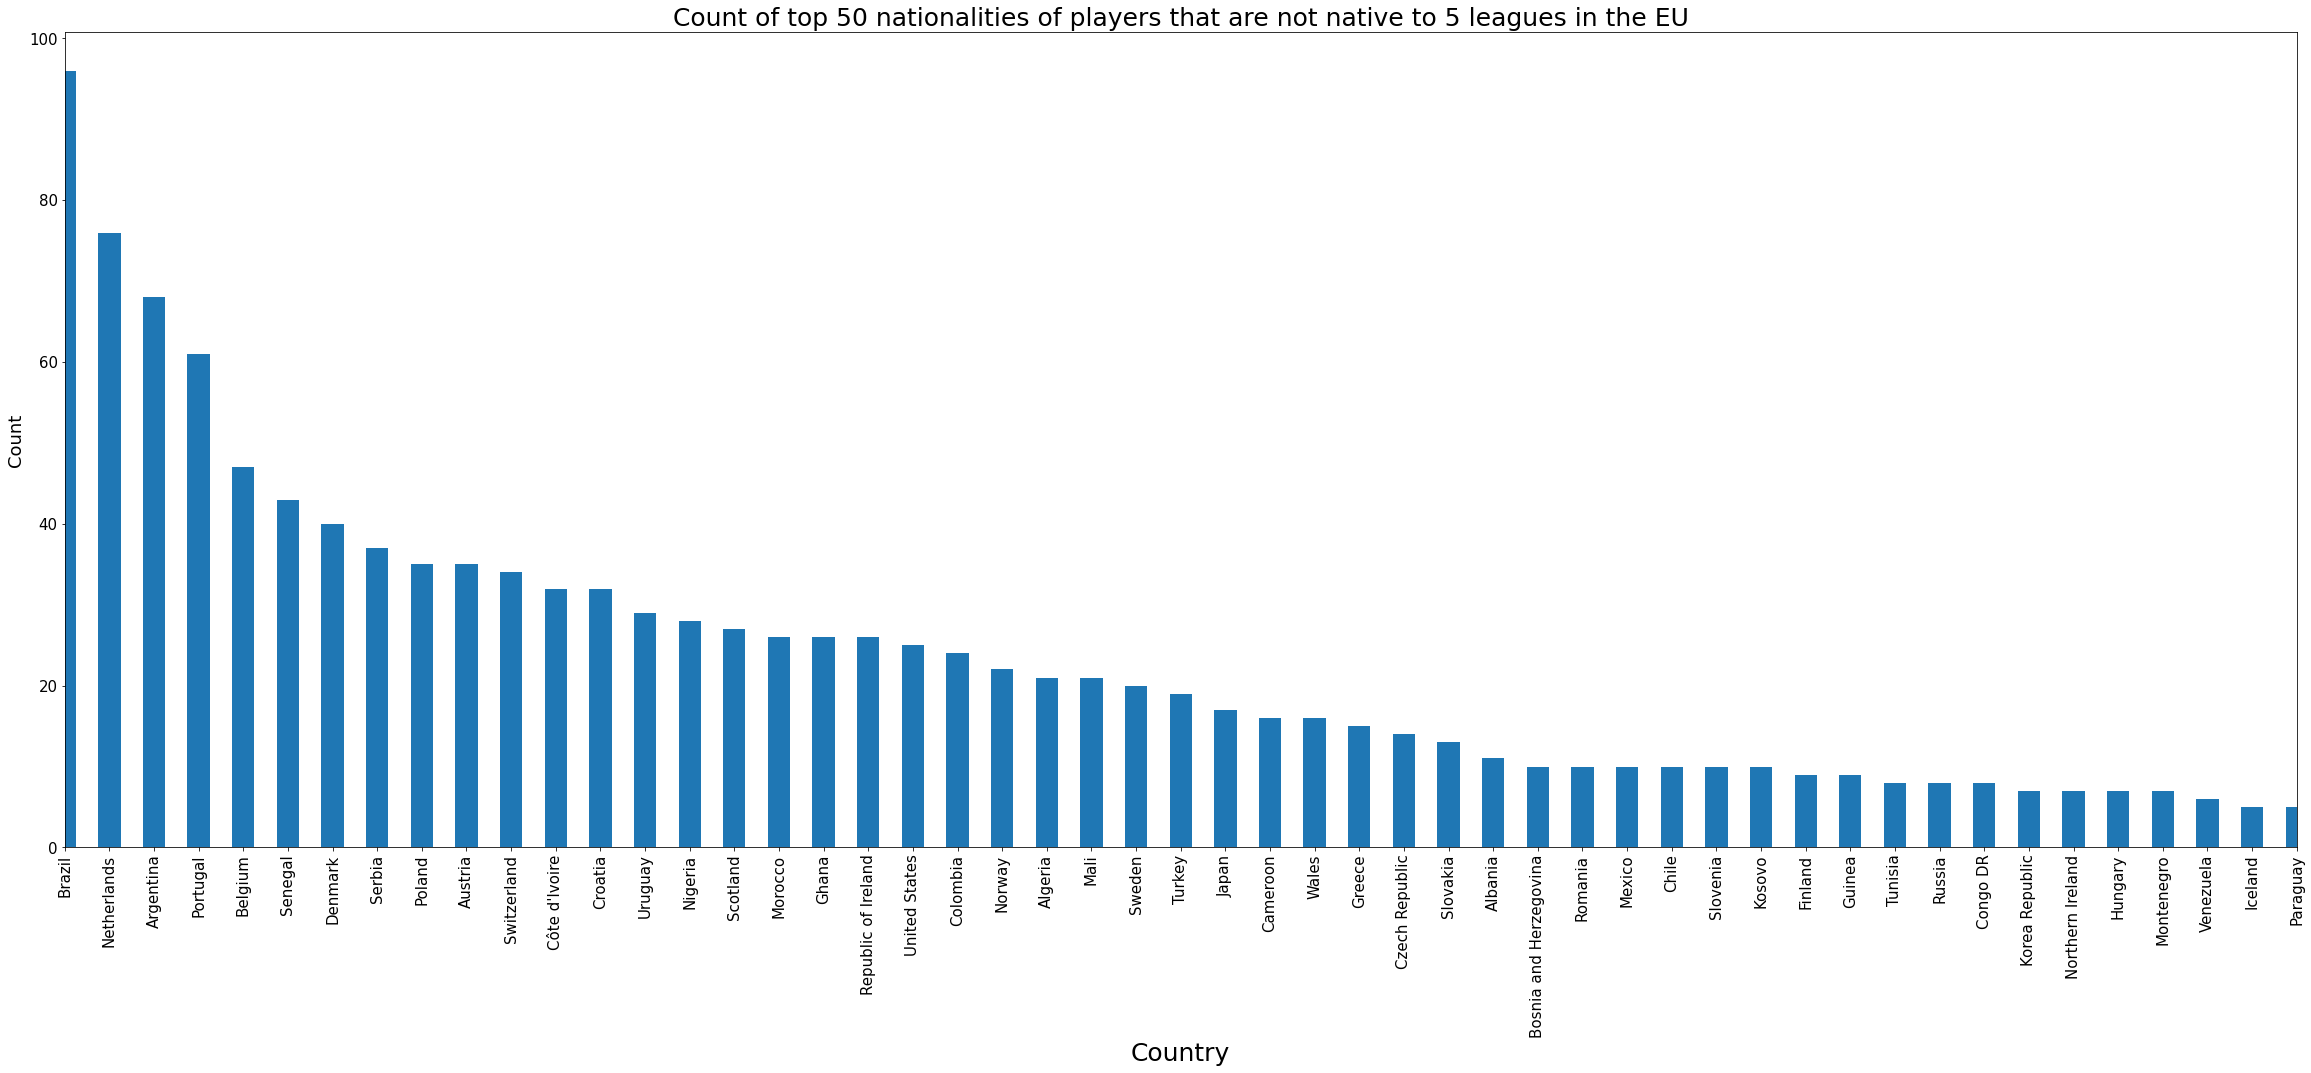

In [20]:
df_top_eu_non_native=df_top_leagues_eu.loc[~((df_top_leagues_eu['nationality'].str.contains('England'))|(df_top_leagues_eu['nationality'].str.contains('Spain'))|(df_top_leagues_eu['nationality'].str.contains('Italy'))|(df_top_leagues_eu['nationality'].str.contains('France'))|(df_top_leagues_eu['nationality'].str.contains('Germany')))]
df_top_eu_non_native['nationality'].value_counts().plot(kind='bar', figsize=(40, 15))
plt.title("Count of top 50 nationalities of players that are not native to 5 leagues in the EU",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,50)
plt.show()

#### As we can see there are high amounts of African and South American players in these leagues as these players are renowned for their football skills

### Plotting the average salaries in the top 5 leagues:

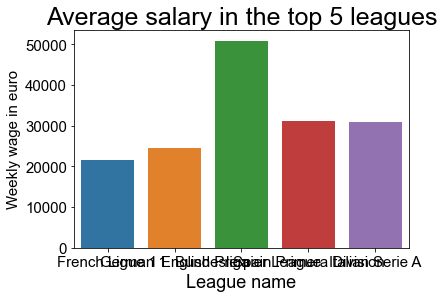

In [21]:
sns.barplot(x="league_name", y="wage_eur", data=df_top_leagues_eu, ci=None)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('Average salary in the top 5 leagues', fontsize =25)
plt.ylabel('Weekly wage in euro',fontsize=15)
plt.xlabel('League name',fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### As per out dataframe, the average salaries in the English Premier League is highest.

### Plotting the salaries of the top 10 players:

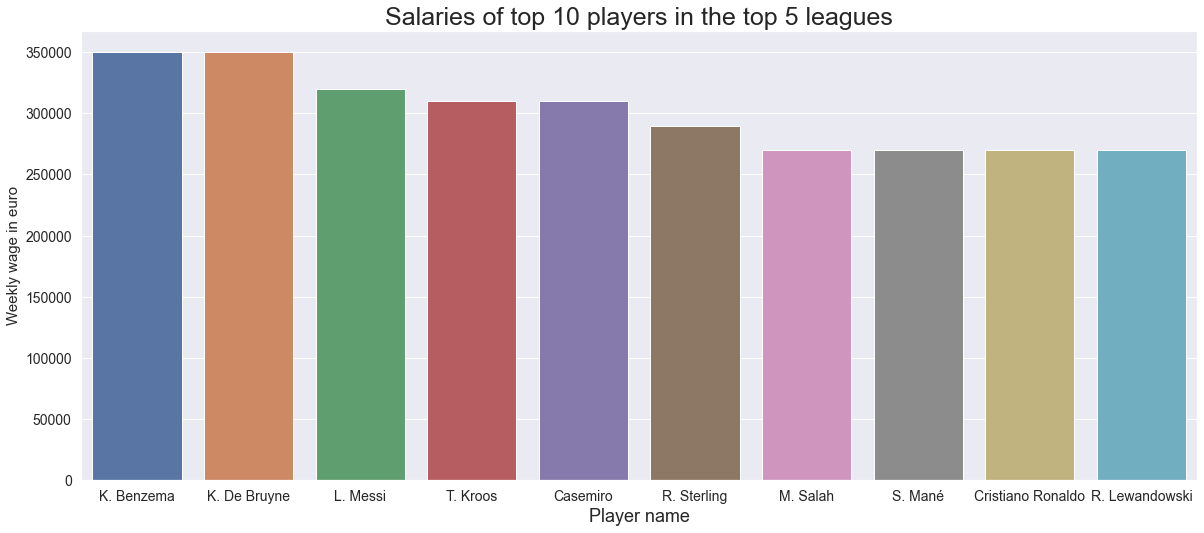

In [22]:
sns.barplot(x="short_name", y="wage_eur", data=df_player_wage, ci=None)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('Salaries of top 10 players in the top 5 leagues', fontsize =25)
plt.ylabel('Weekly wage in euro',fontsize=15)
plt.xlabel('Player name',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

### Plotting the average salary by position in the top 5 leagues:

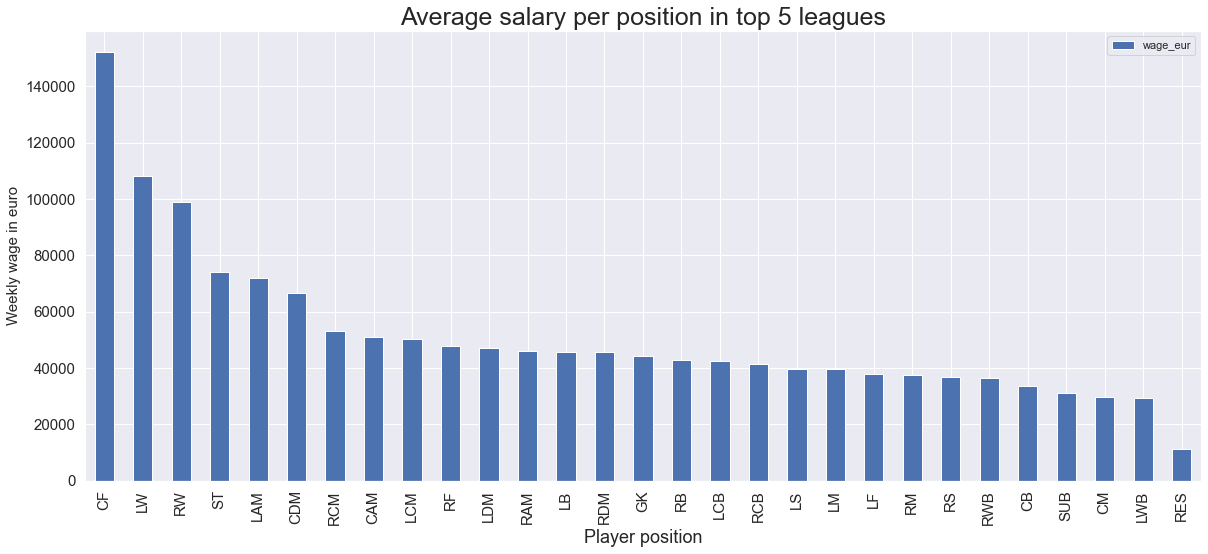

In [23]:
df_top_leagues_eu[['wage_eur','club_position']].groupby('club_position').mean().sort_values('wage_eur',ascending=False).round().plot(kind='bar')
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('Average salary per position in top 5 leagues', fontsize =25)
plt.ylabel('Weekly wage in euro',fontsize=15)
plt.xlabel('Player position',fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### As we can see here, the most lucrative players are in attack, followed by the midfielders and the defenders and goalkeepers.

## Machine learning and salary prediction:

#### We will attempt to build a linear regression model for each of the following categories : Attack, Midfield, Defense and Goalkeepers and attempt to see which variables affect the salaries most for each categories and build a model accordingly:

### Plotting a correlation matrix heatmap to see which variables affect the wage of a goalkeeper the most:

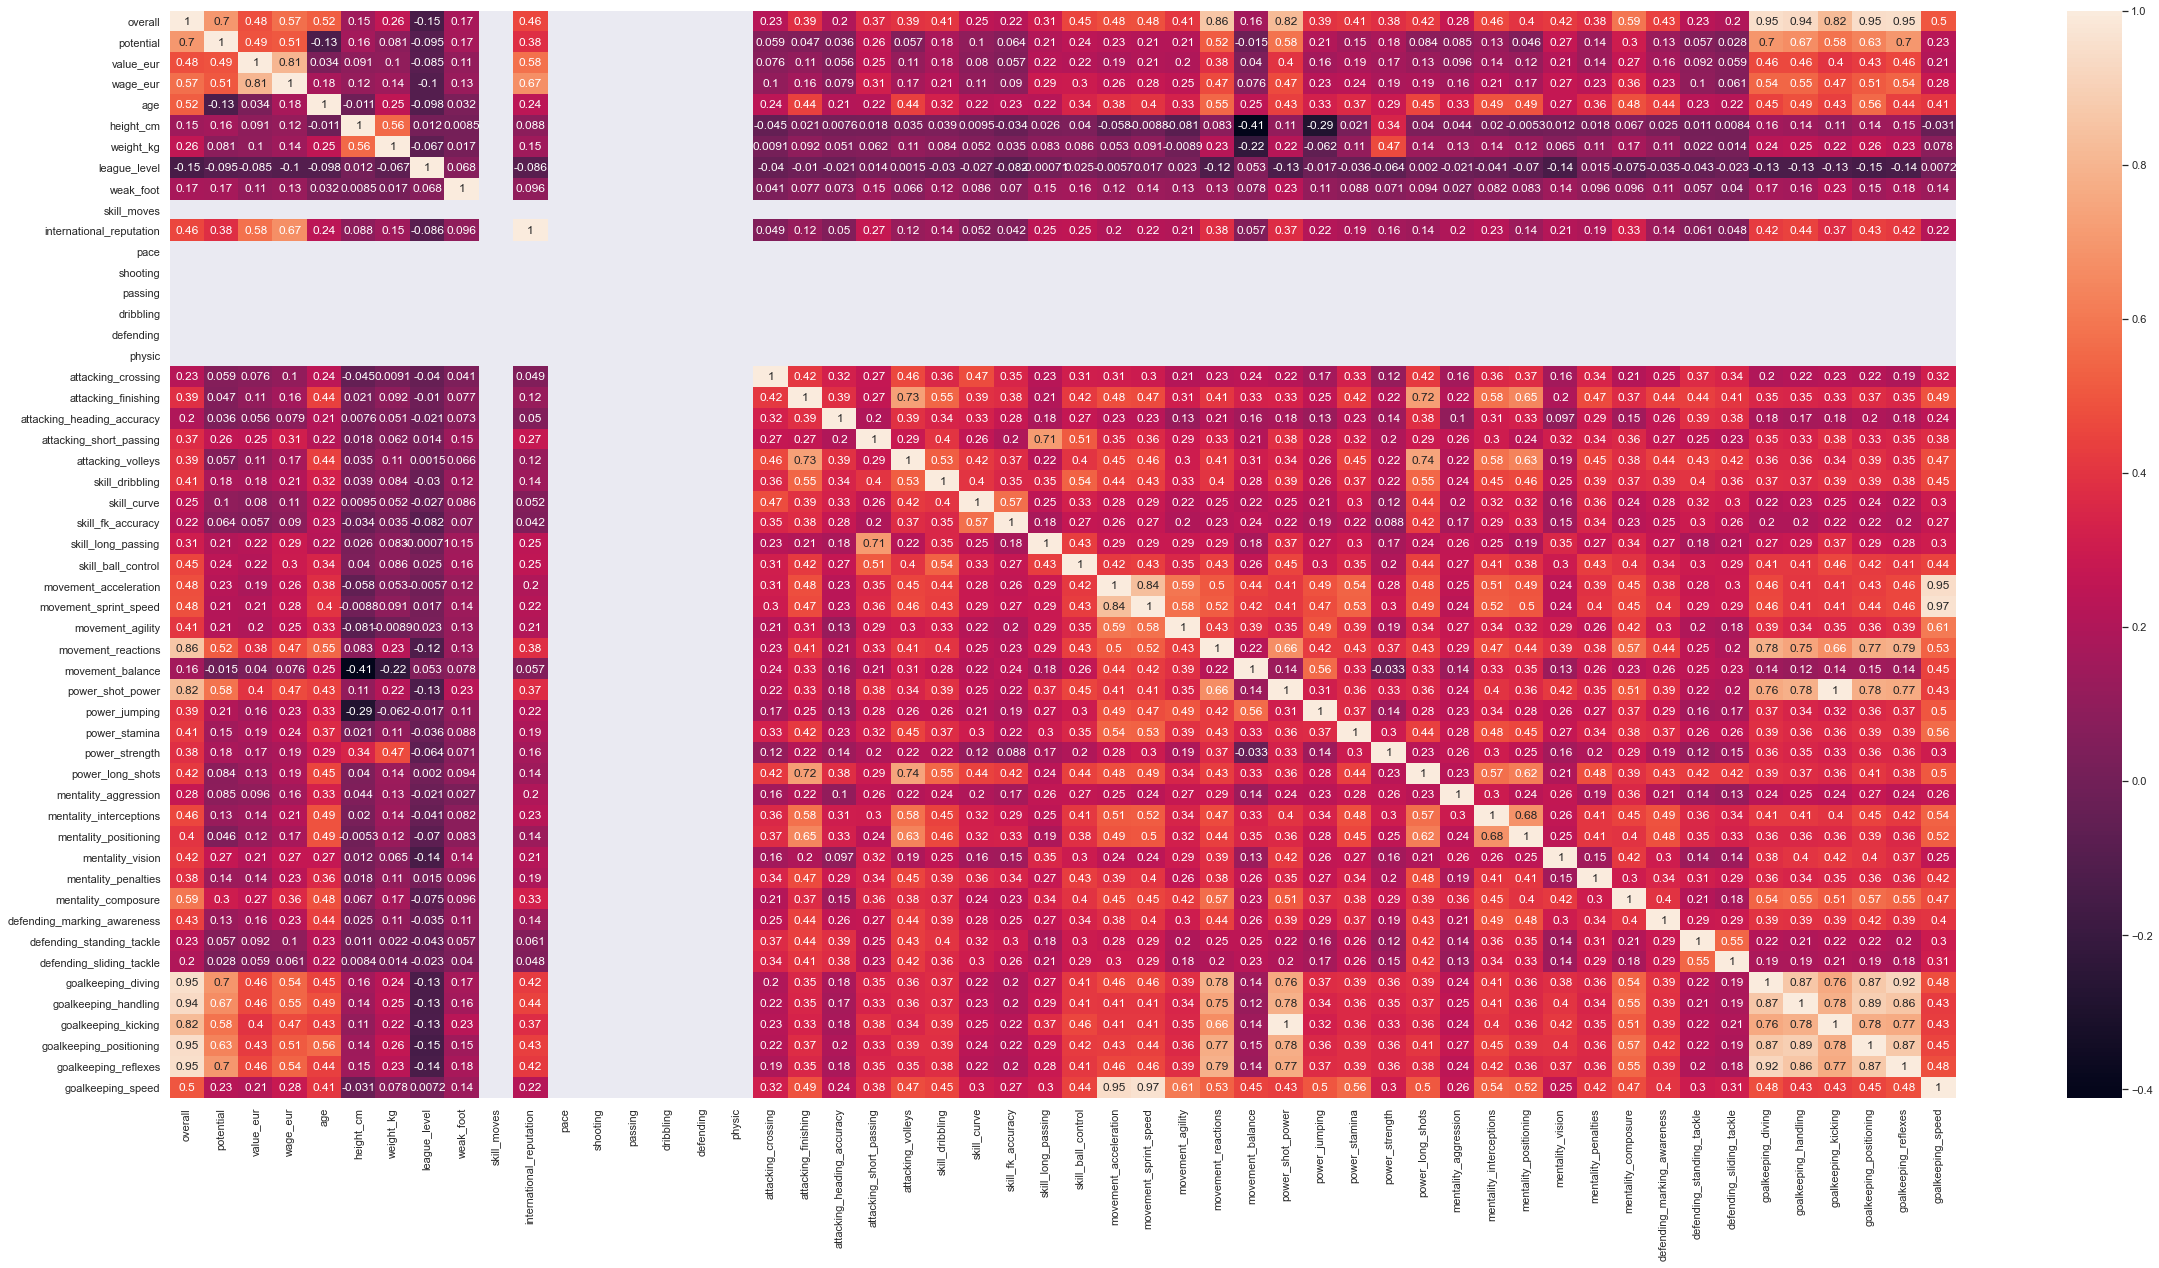

In [37]:
plt.figure(figsize=(40,20))
sns.heatmap(df_goalkeeper.corr(),annot=True)
plt.show()

#### We can see here that the the highest correlation is the value_eur column however we will not be choosing this variable for our model since it is closely linked to the predicted variable which is the wage, we will be choosing the international_reputation variable as well as goalkeeping_diving, goalkeeping_handling, goalkeeping_positioning and goalkeeping_reflexes as these are the important goalkeeping variables. We will alost be ignoring the overall variable as this statistic represents the overall skills of a player and not a specific set of skills.

### Training and testing the model

In [25]:
df_goalkeeper_model=df_goalkeeper[['international_reputation','goalkeeping_diving','goalkeeping_handling','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']]
Xgk=df_goalkeeper_model.drop('wage_eur',axis=1)
Ygk=df_goalkeeper_model.wage_eur

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(Xgk, Ygk, test_size=0.2)

In [27]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
Y_pred_train = model.predict(X_train)

#### We can see below that the mean squared error is high and the coefficient of determination is low, the model does not fare well we will be adressing this point at the end of the analysis.

In [29]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [24803.09092259   253.00405603   400.09737788  -228.71551301
   323.58981166]
Intercept: -68912.35583587081
Mean squared error (MSE): 118207984.36
Coefficient of determination (R^2): 0.55


#### Below we will attempt to predict the wage of the first goalkeeper in the list:

In [30]:
lm=LinearRegression()
z=df_goalkeeper[['international_reputation','goalkeeping_diving','goalkeeping_handling','goalkeeping_positioning','goalkeeping_reflexes']]
lm.fit(z,df_goalkeeper['wage_eur'])
lm.predict([[5,87,92,90,90]])

array([114613.8428884])

In [31]:
df_goalkeeper.iloc[0]

short_name                                   J. Oblak
player_positions                                   GK
overall                                            91
potential                                          93
value_eur                                   112000000
wage_eur                                       130000
age                                                28
height_cm                                         188
weight_kg                                          87
club_name                          Atlético de Madrid
league_name                    Spain Primera Division
league_level                                        1
club_position                                      GK
nationality                                  Slovenia
preferred_foot                                  Right
weak_foot                                           3
skill_moves                                         1
international_reputation                            5
work_rate                   

#### There is a difference of about 15387 euros in the predicted salary of 114613 euros and the actualy salary of 130000 euros.

### Plotting a correlation matrix heatmap to see which variables affect the wage of a defender the most:

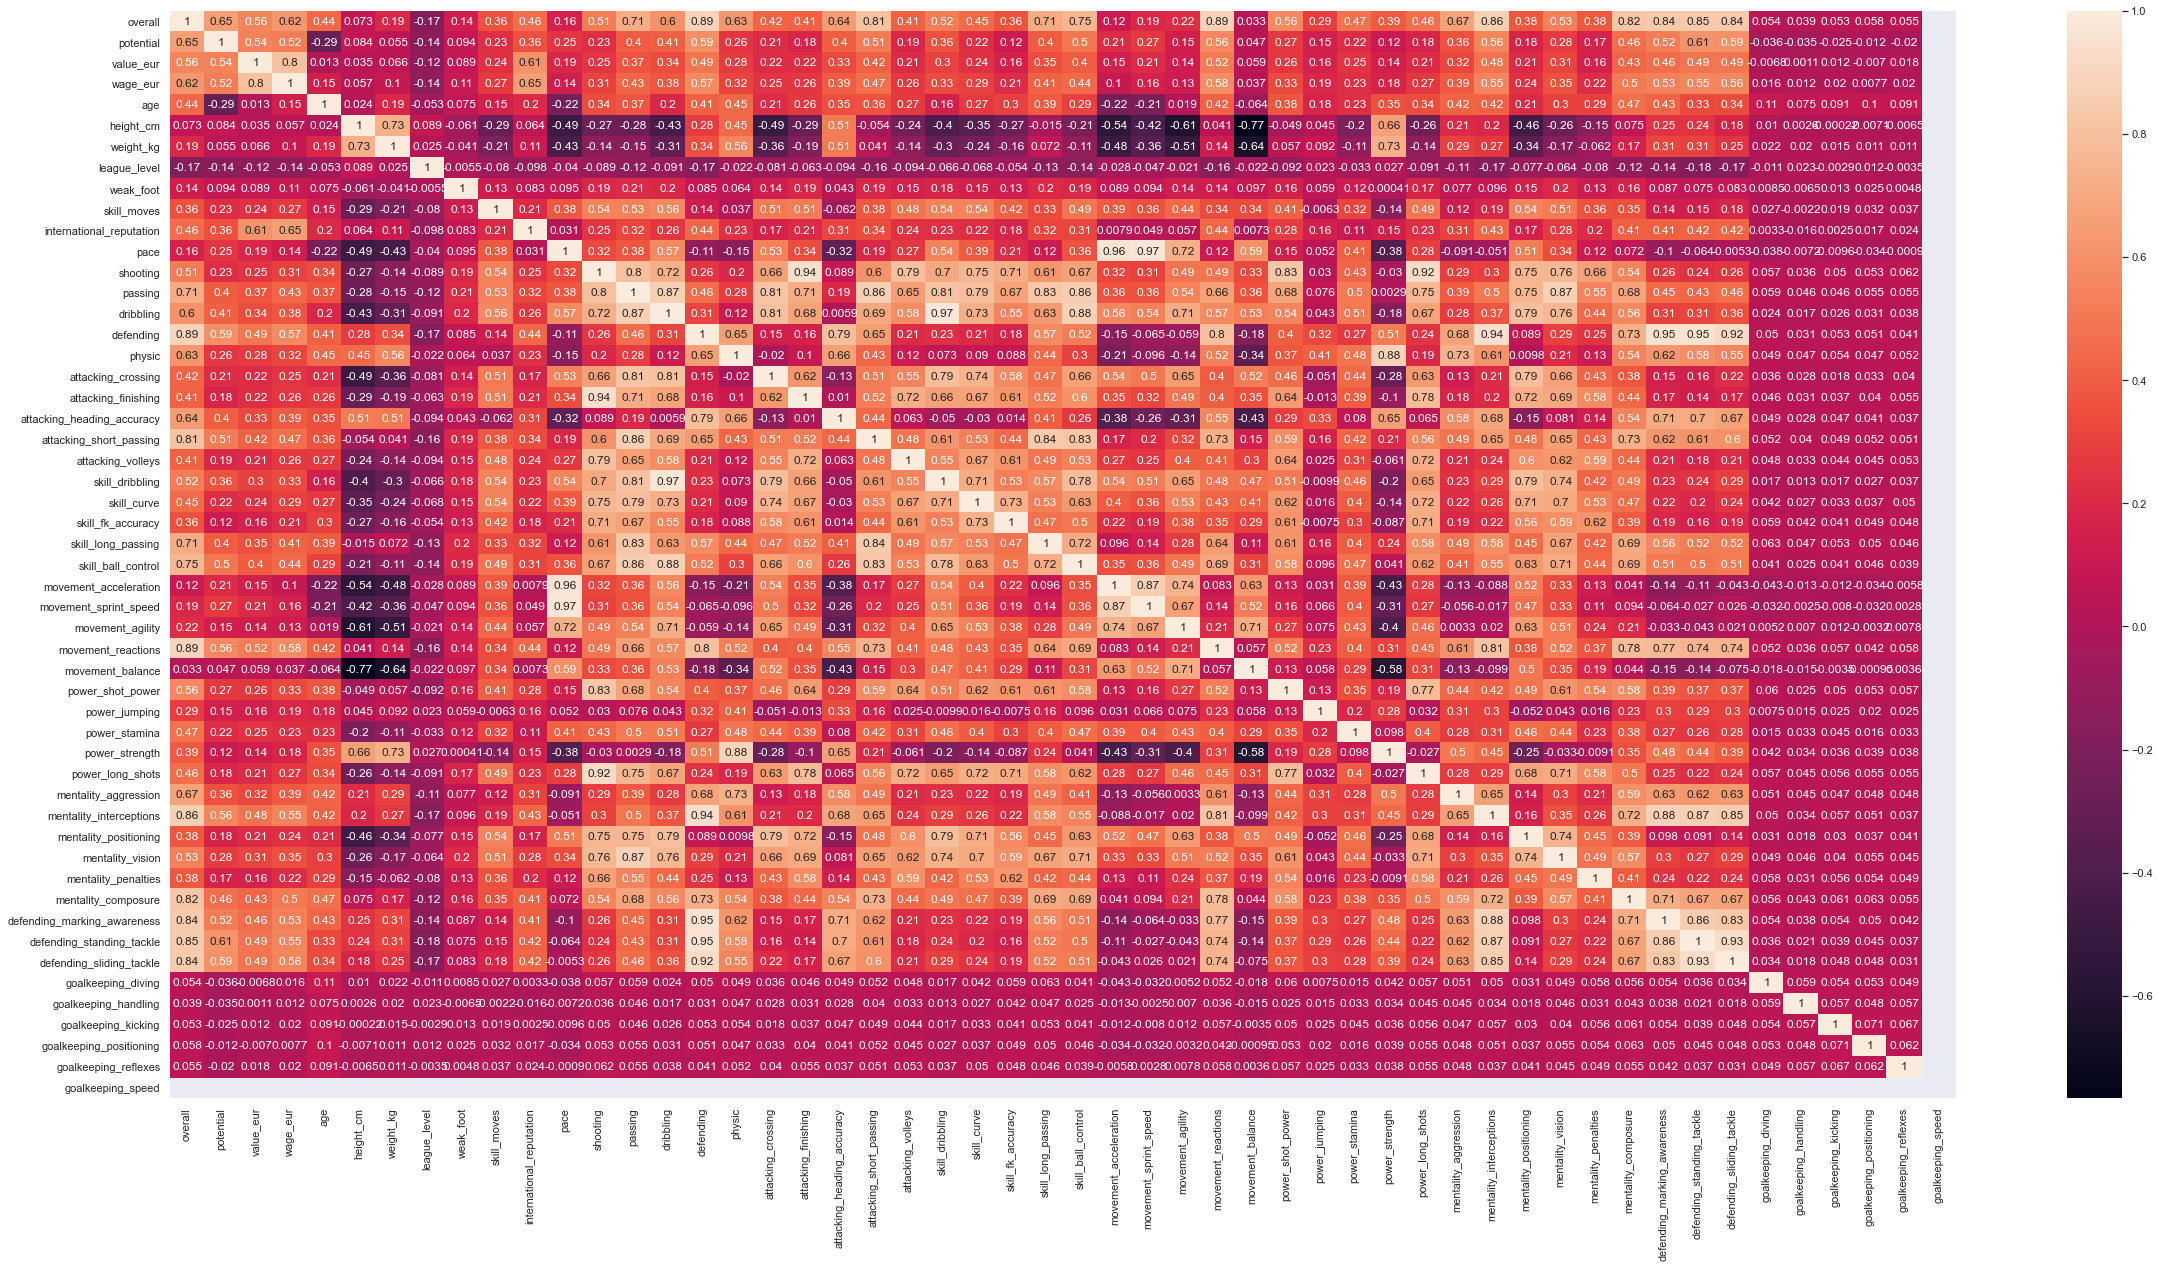

In [34]:
plt.figure(figsize=(40,20))
sns.heatmap(df_defense.corr(),annot=True)
plt.show()

### Building the defense model

In [94]:
df_defense_model=df_defense[['international_reputation','defending','movement_reactions','mentality_interceptions','wage_eur']]
Xdf=df_defense_model.drop('wage_eur',axis=1)
Ydf=df_defense_model.wage_eur

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Ydf, test_size=0.2)

In [96]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [97]:
Y_pred_train = model.predict(X_train)

In [98]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [25103.49790266   507.09398196   490.82798794   -99.13154367]
Intercept: -74719.62728001301
Mean squared error (MSE): 139160153.86
Coefficient of determination (R^2): 0.54


#### Below we will attempt to predict the wage of a random first defender in the list:

In [100]:
lm=LinearRegression()
z=df_defense[['international_reputation','defending','movement_reactions','mentality_interceptions']]
lm.fit(z,df_defense['wage_eur'])
lm.predict([[3,84,84,81]])

array([75380.2071299])

In [101]:
df_defense.iloc[23]

short_name                          M. de Ligt
player_positions                            CB
overall                                     85
potential                                   90
value_eur                             75000000
wage_eur                                 81000
age                                         21
height_cm                                  189
weight_kg                                   89
club_name                             Juventus
league_name                    Italian Serie A
league_level                                 1
club_position                              LCB
nationality                        Netherlands
preferred_foot                           Right
weak_foot                                    3
skill_moves                                  2
international_reputation                     3
work_rate                          Medium/High
pace                                        73
shooting                                    59
passing      

#### We can see that there is a small difference in this prediction, a difference of about 5620 euros per week.

### Plotting a correlation matrix heatmap to see which variables affect the wage of a midfielder the most:

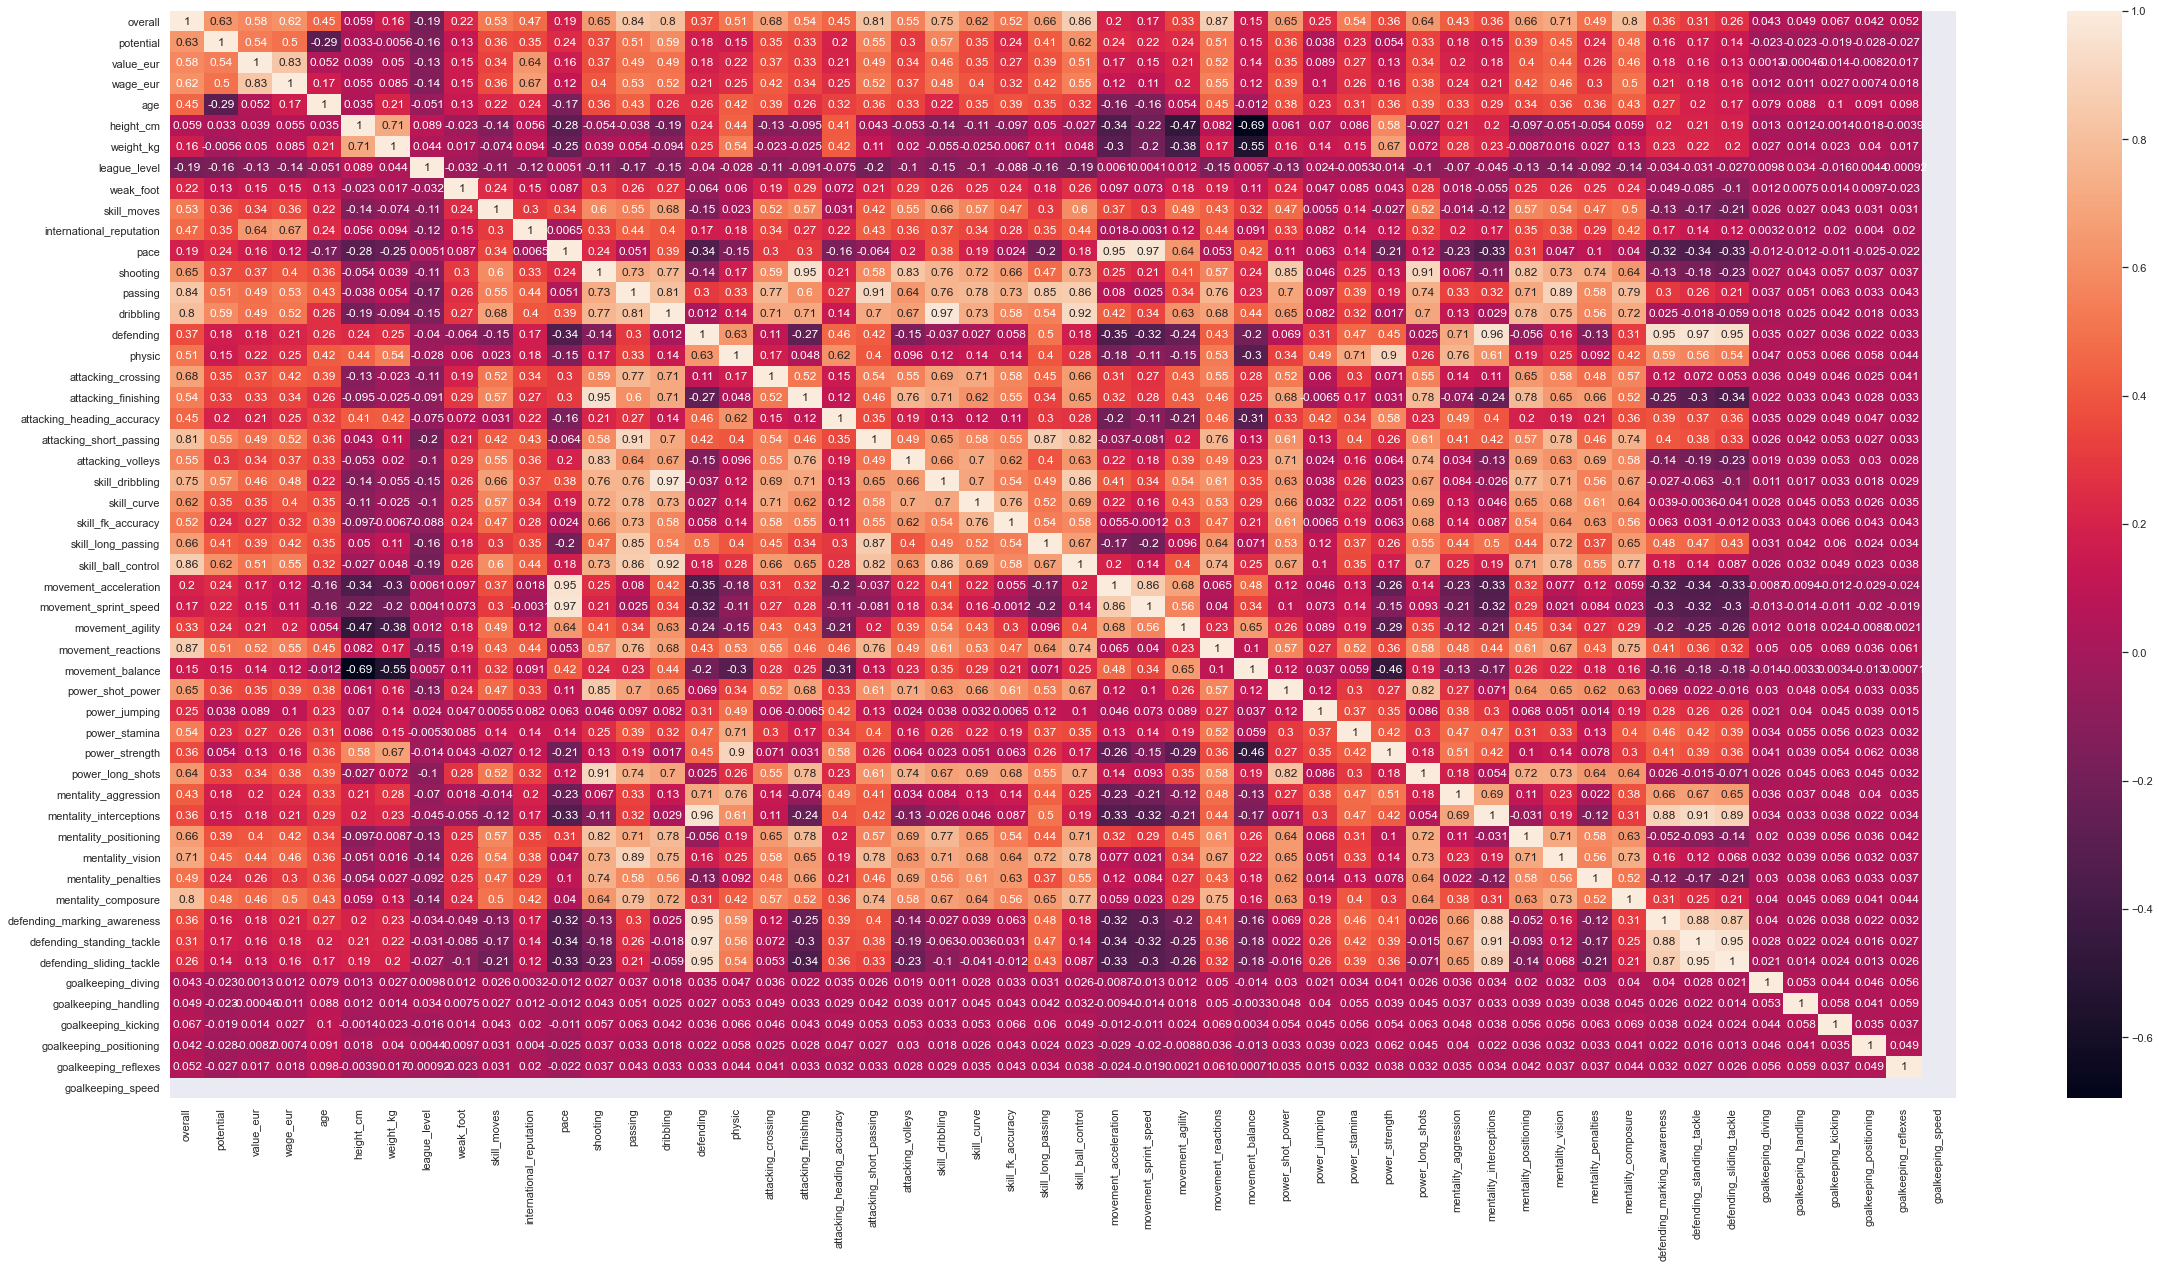

In [54]:
plt.figure(figsize=(40,20))
sns.heatmap(df_midfield.corr(),annot=True)
plt.show()

#### Building the model:

In [80]:
df_midfield_model=df_midfield[['international_reputation','passing','skill_ball_control','movement_reactions','wage_eur']]
Xmf=df_midfield_model.drop('wage_eur',axis=1)
Ymf=df_midfield_model.wage_eur

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(Xmf, Ymf, test_size=0.2)

In [82]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [83]:
Y_pred_train = model.predict(X_train)

In [84]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [2.61319950e+04 2.03911867e+01 4.40187682e+02 4.35899746e+02]
Intercept: -76752.35240964302
Mean squared error (MSE): 176659155.66
Coefficient of determination (R^2): 0.54


#### Below we will attempt to predict the wage of a random midfielder in the list:

In [87]:
lm=LinearRegression()
z=df_midfield[['international_reputation','passing','skill_ball_control','movement_reactions']]
lm.fit(z,df_midfield['wage_eur'])
lm.predict([[2,83,90,84]])

array([52822.05996635])

In [85]:
df_midfield.iloc[25]

short_name                             Bernardo Silva
player_positions                          CAM, CM, RW
overall                                            86
potential                                          87
value_eur                                    80000000
wage_eur                                       200000
age                                                26
height_cm                                         173
weight_kg                                          64
club_name                             Manchester City
league_name                    English Premier League
league_level                                        1
club_position                                     SUB
nationality                                  Portugal
preferred_foot                                   Left
weak_foot                                           3
skill_moves                                         4
international_reputation                            2
work_rate                   

#### Here we can see that the predicted wage is as well off around 75 off for the random midfielder in the list we will be addressing this in the conclusion.

### Plotting a correlation matrix heatmap to see which variables affect the wage of an attacker the most:

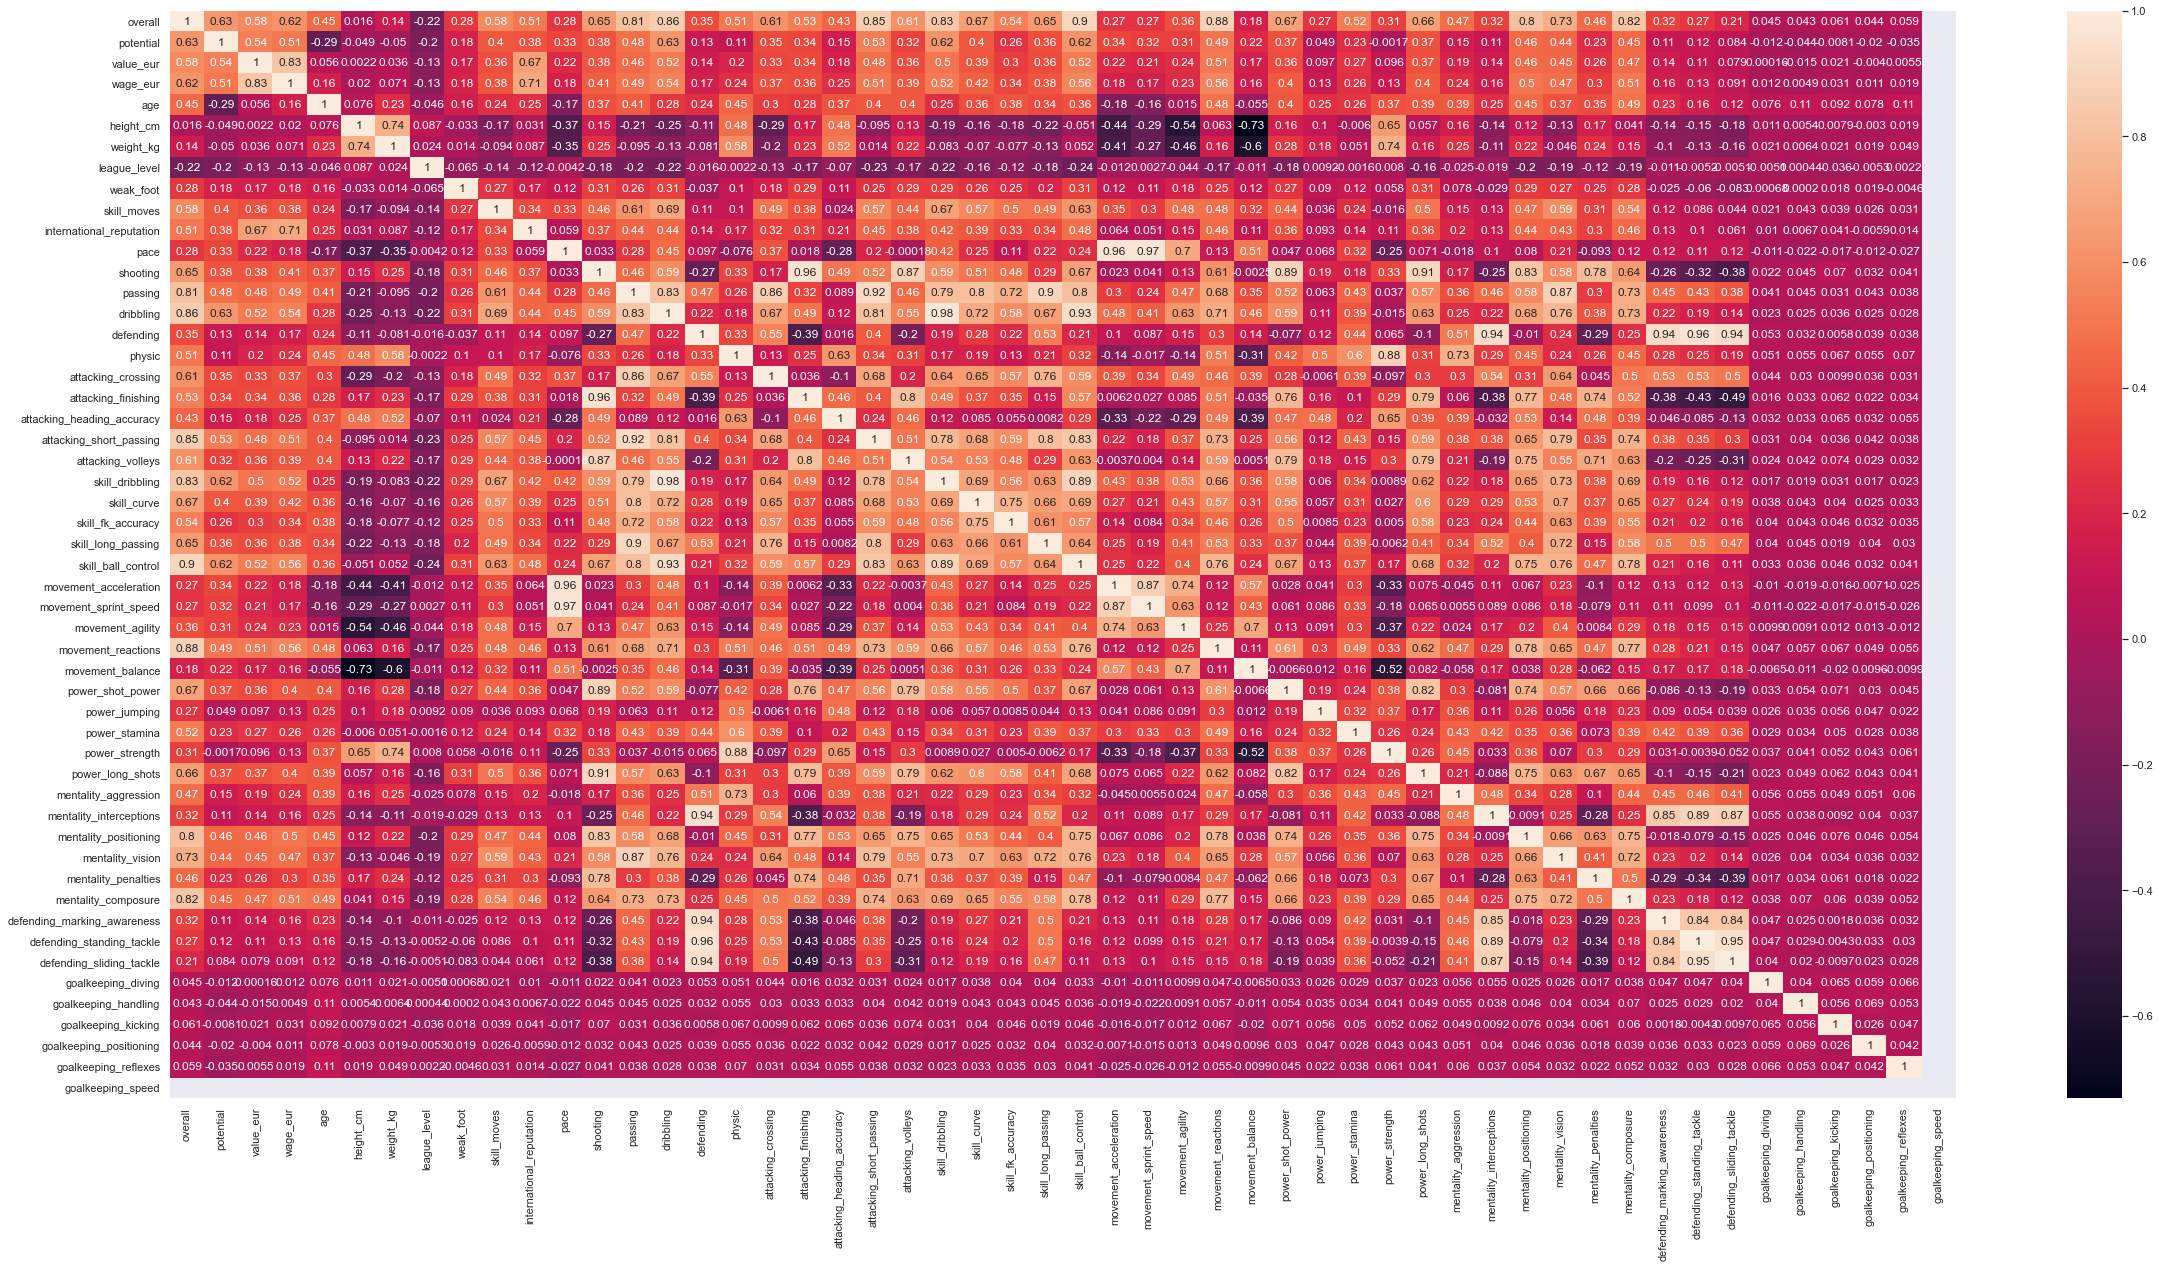

In [69]:
plt.figure(figsize=(40,20))
sns.heatmap(df_attack.corr(),annot=True)
plt.show()

### Building the model:

In [70]:
df_attack_model=df_attack[['international_reputation','dribbling','skill_ball_control','movement_reactions','wage_eur']]
Xatt=df_attack_model.drop('wage_eur',axis=1)
Yatt=df_attack_model.wage_eur

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(Xatt, Yatt, test_size=0.2)

In [72]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [73]:
Y_pred_train = model.predict(X_train)

In [74]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [29111.26651889   432.40734441   103.79247232   447.39937216]
Intercept: -85215.19391551448
Mean squared error (MSE): 227410248.04
Coefficient of determination (R^2): 0.57


### Below we will attempt to predict the wage of a random attacker in the list:

In [79]:
lm=LinearRegression()
z=df_attack[['international_reputation','dribbling','skill_ball_control','movement_reactions']]
lm.fit(z,df_attack['wage_eur'])
lm.predict([[4,84,86,86]])

array([116075.00521651])

In [78]:
df_attack.iloc[30]

short_name                                  M. Reus
player_positions                            CAM, CF
overall                                          85
potential                                        85
value_eur                                  43000000
wage_eur                                      95000
age                                              32
height_cm                                       180
weight_kg                                        71
club_name                         Borussia Dortmund
league_name                    German 1. Bundesliga
league_level                                      1
club_position                                   CAM
nationality                                 Germany
preferred_foot                                Right
weak_foot                                         4
skill_moves                                       4
international_reputation                          4
work_rate                               High/Medium
pace        

#### Here we can see that there is a difference of about 21075 euros in the weekly wage.

### In conclusion we can say that this is not the best model due to wage being determined by multiple factors, such as contract negotiations, skill of the player's agent/manager and the idea that some clubs might want to attract certain players by paying them a high wage, higher than they deserve to attract them from their former clubs or because of their need for a certain player playing in a certain position which may inflate the salary.